In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.mlab as mlab

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

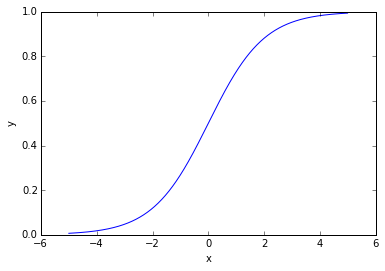

In [6]:
xs = np.arange(-5, 5, 0.01)
ys = [sigmoid(x) for x in xs]
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y")

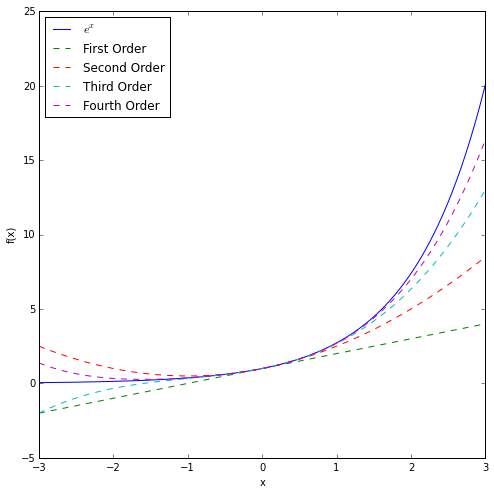

In [15]:
ws = np.linspace(-3, 3, 500)
plt.figure(figsize=(8, 8))
plt.plot(ws, np.exp(ws), label="$e^x$")
plt.plot(ws, 1+ws, "--", label="First Order")
plt.plot(ws, 1 + ws + ws**2/2, "--", label = "Second Order")
plt.plot(ws, 1 + ws + ws**2/2 + ws**3/6,  "--", label = "Third Order")
plt.plot(ws, 1 + ws + ws**2/2 + ws**3/6 + ws**4/24,  "--", label = "Fourth Order")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc = "upper left")

In [38]:
from scipy.stats import norm
from scipy.special import gamma

In [51]:
def gammapdf(y, a, b):
    return b**a/gamma(a)*y**(a-1)*np.exp(-b*y)

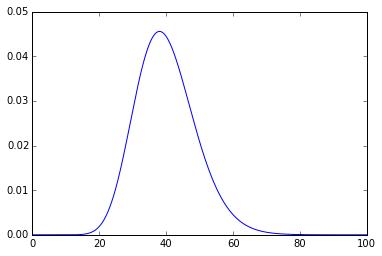

In [53]:
xs = np.linspace(0, 100, 1000)
plt.plot(xs, gammapdf(xs, 20, 0.5))

In [79]:
def lgamma(a, b):
    yhat = (a - 1.0)/b
    sigma = (a - 1.0)/b**2
    ylow, yhigh = norm.interval(0.995, loc = yhat, scale=np.sqrt(sigma))
    if ylow < 0: #correction for if negative values are in the range
        ylow = 0.0
        yhigh *= 3
    xs = np.linspace(ylow, yhigh, 1000)
    plt.plot(xs, gammapdf(xs, a, b), label="Actual")
    plt.plot(xs, norm.pdf(xs, yhat, np.sqrt(sigma)), "--", label="Approximation")
    plt.legend()
    plt.xlabel("y")
    plt.ylabel("p(y)")

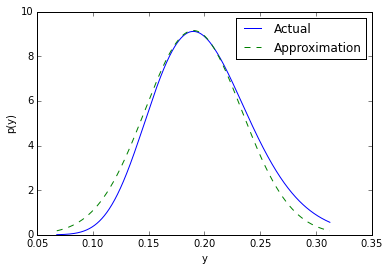

In [84]:
lgamma(20, 100)

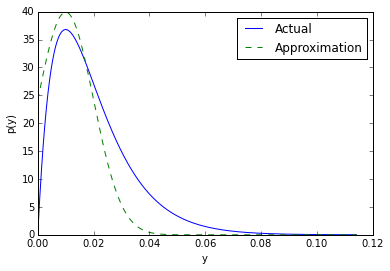

In [85]:
lgamma(2, 100)

In [5]:
def q(x, y):
    #parameters in order sigmax, sigmay, mux, muy, covxy
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1 + 28.4*g2/29.0

In [10]:
N = 100000
s = 10
r = np.zeros(2)
p = q(r[0], r[1])
print p
samples = []

0.00632453617818


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


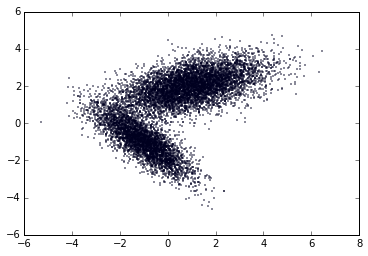

In [11]:
for i in xrange(N):
    rn = r + np.random.normal(size=2)
    pn = q(rn[0], rn[1])
    if pn >= p: #comparison of acceptance ratio
        p = pn
        r = rn
    else:
        u = np.random.rand() #draw from uniform distribution
        if u < pn/p:   #accept with probability r
            p = pn
            r = rn
    if i % s == 0:
        samples.append(r)
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha = 0.5, s = 1)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


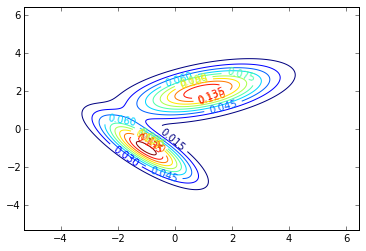

In [13]:
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline = 1, fontsize = 10)
plt.show()

In [ ]:
from math import *
from matplotlib.pylab import *

def sdnorm(z):
    """
    Standard normal pdf (Probability Density Function)
    """
    return exp(-z*z/2.)/sqrt(2*pi)

In [19]:
def exponen(z, lamb = 1.0):
    return lamb * exp(-lamb * z)

In [16]:
def metro(n, alpha, xlow, xhigh, distribution):
    x = 0.
    vec = []
    vec.append(x)
    innov = uniform(-alpha,alpha,n) #random innovation, uniform proposal distribution
    for i in xrange(1, n):
        can = x + innov[i] #candidate
        aprob = min([1., distribution(can)/distribution(x)]) #acceptance probability
        u = uniform(0, 1)
        if u < aprob:
            x = can
            vec.append(x)

    #plotting the results:
    #theoretical curve
    x = arange(xlow, xhigh, .01)
    y = distribution(x)
    subplot(211)
    title('Metropolis-Hastings')
    plot(vec)
    subplot(212)

    hist(vec, bins=30,normed=1)
    plot(x, y, 'ro')
    ylabel('Frequency')
    xlabel('x')
    legend(('PDF', 'Samples'))
    show()

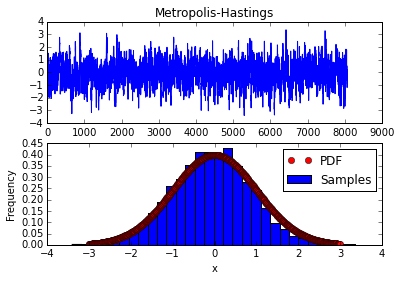

In [26]:
metro(10000, 1.0, -3, 3, sdnorm)